Инструкция по выполнению проекта
Загрузите и подготовьте данные. Поясните порядок действий.
Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.
Улучшите качество модели, учитывая дисбаланс классов. Обучите разные модели и найдите лучшую. Кратко опишите выводы.
Проведите финальное тестирование.
Описание данных
Данные находятся в файле /datasets/Churn.csv (англ. «отток клиентов»). Скачать датасет

## Признаки
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
= Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата
## Целевой признак
- Exited — факт ухода клиента

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
!pip install scikit-learn==1.1.3

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.utils import shuffle

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score, roc_auc_score

In [73]:
data = pd.read_csv("/datasets/Churn.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [74]:
data.shape

(10000, 14)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [76]:
data.duplicated().sum()

0

In [77]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Избавимся от пропущенных значений

In [78]:
data.dropna(subset = ["Tenure"], inplace = True)

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'> <u><b> </b></u></font>
    <br />
    <font color='4682B4'> Ну чтобы не исказить значения, которые будут выведены после машинного обучения,  не заменила эти значения на другие, так как это могло бы привести к переобучению модели</font>
</div>

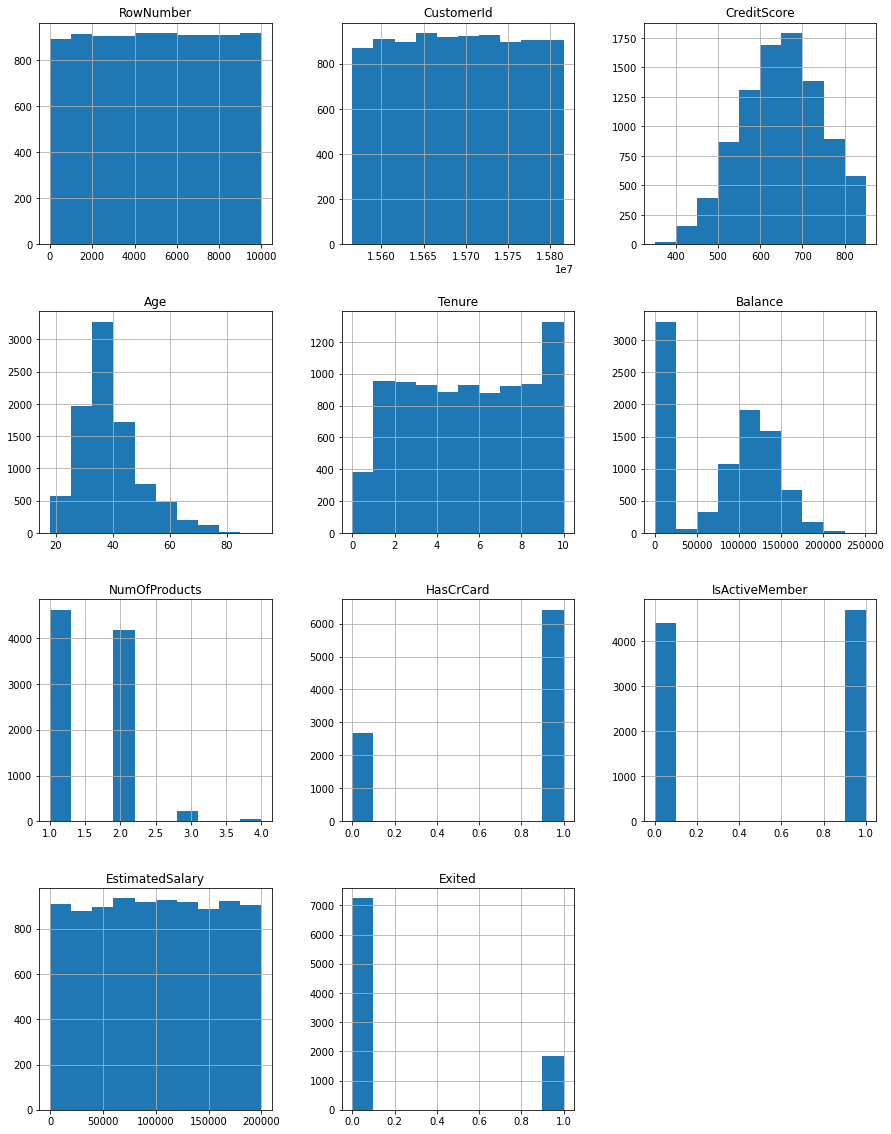

In [79]:
data.hist(figsize = (15,20));

**Вывод:**
Целевой признак для нашей задачи – Exited, модель должна будет предсказывать значение 1 если клиент уйдет или 0 если нет. 

## Исследование задачи

Преобразуем категориальные признаки

In [80]:
data["Geography"].unique()
#cстран тоже не так много, поэтому тоже можем преобразовать данные 

array(['France', 'Spain', 'Germany'], dtype=object)

In [81]:
data_ohe = data.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
data_ohe = pd.get_dummies(data_ohe, drop_first=True)

In [82]:
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9091 non-null   int64  
 1   Age                9091 non-null   int64  
 2   Tenure             9091 non-null   float64
 3   Balance            9091 non-null   float64
 4   NumOfProducts      9091 non-null   int64  
 5   HasCrCard          9091 non-null   int64  
 6   IsActiveMember     9091 non-null   int64  
 7   EstimatedSalary    9091 non-null   float64
 8   Exited             9091 non-null   int64  
 9   Geography_Germany  9091 non-null   uint8  
 10  Geography_Spain    9091 non-null   uint8  
 11  Gender_Male        9091 non-null   uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 736.9 KB


In [83]:
#data['Gender'] = pd.get_dummies(data['Gender'], drop_first=True)

In [84]:
#data["Geography"] = pd.get_dummies(data['Geography'], drop_first=True)

Удалим столбцы, которые не несут информации, нужной для машинного обучения:
RowNumber — индекс строки в данных
CustomerId — уникальный идентификатор клиента
Surname — фамилия

Определим targer(целевой признак) и features(признак для обучения модели)

In [85]:
target = data_ohe["Exited"]
features = data_ohe.drop("Exited", axis=1)

Разобьем исходный набор данных на три части- обучающую, валидационную и тестовую (3:1:1)

In [86]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size = 0.4, random_state = 12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size = 0.5, random_state = 12345)

## Совет
    
Можно использовать класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html">OHE из sklearn</a>. 

Практикум подготовил инструкцию, как использовать OHE: https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing 

Есть загвоздка, что нам нужно будет одновременно использовать параметры drop='first' и handle_unknown='ignore’.  в OHE, а на платформе такое сочетание может выдавать ошибку (в части случаев). Если ошибка появляется, необходимо загрузить нужную версию сайкит-лерна. Для этого:

1. В отдельной строке в самом начале проекта запускаем такую команду:
 `!pip install scikit-learn==1.1.3`
     
2. Находим в меню юпитера кнопку `Kernel`, нажимаем и выбираем Restart&Run all 


И сразу уточню, что OHE мы используем уже после разделения выборок на обучающую, валидационную и тестовую. Обучаем на трейне, применяем ко всем. Кодируем после разбиения по аналогии с масштабированием. Посмотреть поподробнее также можно здесь <a href="https://stackoverflow.com/questions/55525195/do-i-have-to-do-one-hot-encoding-separately-for-train-and-test-dataset">можно здесь</a> .
      
</div> 


Масштабируем признаки

In [87]:
pd.options.mode.chained_assignment = None

In [88]:
scaler = StandardScaler()
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler.fit(features_train[numeric])
    
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Изучим исследуемый параметр

0    7237
1    1854
Name: Exited, dtype: int64

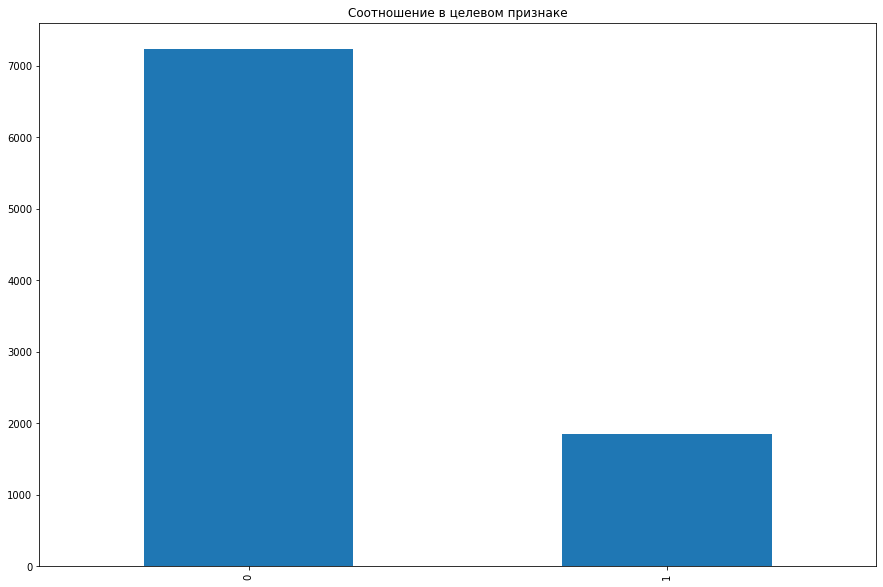

In [89]:
plt.figure(figsize=(15, 10))
data["Exited"].value_counts().plot(kind = "bar", title = "Соотношение в целевом признаке", label = '0-не ушел, 1-клиент ушел') 
data["Exited"].value_counts()

Соотношение признаков несбалансировано. В этой задаче наблюдается сильный дисбаланс классов, что плохо сказывается на обучении модели. Классы несбалансированны, когда их соотношение далеко от 1:1.

Accuracy в случае дисбаланса классов не подходит.

**Вывод**

1. Пропуски обработали - удалили все значения с пропусками
2. Удалили лишние колонки, которые не несут важной информации для обучения моделей
3. Преобразовали категориальные признаки в численные
4. Разбили данные на выборки
5. Масшибировали признаки
6. Написали вывод по предобработка

**Логистическая регрессия**


In [90]:
model = LogisticRegression(solver='liblinear', random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print(f'F1-мера на валидационной выборке: {f1_score(target_valid, predicted_valid)}')

F1-мера на валидационной выборке: 0.30400000000000005


**Деревоо решений**

In [91]:
best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 20):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
print(f'F1-мера на валидационной выборке: {result},  с глубиной дерева {best_depth}')

F1-мера на валидационной выборке: 0.4862023653088042,  с глубиной дерева 7


**Случайный лес**

In [93]:
best_model = 0
best_result = 0
best_depth = 0
for estimator in range(1, 200):
    model = RandomForestClassifier(n_estimators=estimator, max_depth=7, random_state=12345)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_estimator = estimator
print(f'F1-мера на валидационной выборке: {result},  количество деревьев {best_estimator}')

F1-мера на валидационной выборке: 0.5541740674955595,  количество деревьев 21


**Вывод**

По результатам исследования моделей без учёта дисбаланса классов можно сделать следующие заключения:
1. F1-мера Логистической регрессии на валидационной выборке: 0.304, скорее всего потому что целевой признак и остальные нелинейно связаны меджду собой
2. F1-мера на валидационной выборке Дерева решений: 0.486, с глубиной дерева 7
3. F1-мера на валидационной выборке Случайного леса: 0.554, с  количеством деревьев 21 и глубиной дерева 7

## Борьба с дисбалансом

0    7237
1    1854
Name: Exited, dtype: int64

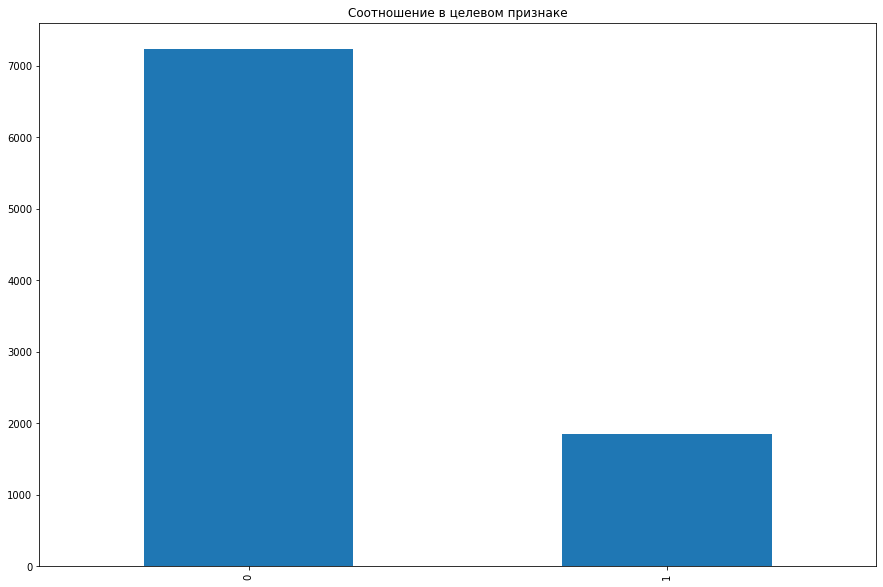

In [97]:
#Еще раз посмотрим на изучаемый параметрв на рисунке без легенды (

plt.figure(figsize=(15, 10))
data_ohe["Exited"].value_counts().plot(kind = "bar", title = "Соотношение в целевом признаке", label = '0-не ушел, 1-клиент ушел') 
data_ohe["Exited"].value_counts()

Ничего не поменялось за те долгие минуты, когда у меня грузила модель случайного леса

**Балансировка классов**

Проведем балансировку классов при помощи аргумента class_weight

Логистическая регрессия

In [130]:
model = LogisticRegression(solver='liblinear', random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print(f'F1-мера на валидационной выборке: {f1_score(target_valid, predicted_valid)}')

F1-мера на валидационной выборке: 0.509731232622799


Дерево решений

In [133]:
best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 20):
    model = DecisionTreeClassifier(class_weight='balanced', max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
print(f'F1-мера на валидационной выборке: {result},  с глубиной дерева {best_depth}')

F1-мера на валидационной выборке: 0.467741935483871,  с глубиной дерева 5


Случайный лес

In [134]:
best_model = 0
best_result = 0
best_depth = 0
for estimator in range(1, 200):
    model = RandomForestClassifier(class_weight='balanced', n_estimators=estimator, max_depth=5, random_state=12345)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_estimator = estimator
print(f'F1-мера на валидационной выборке: {result},  количество деревьев {best_estimator}')

F1-мера на валидационной выборке: 0.6027987082884823,  количество деревьев 113


**Увеличение выборк**

Сбалансируем классы путём увеличения числа, с помощью функции upsampling, в которой происходит преобразование в несколько этапов:
1.Разделяем обучающую выборку на объекты по классам;
2.Определяем тот класс, который содержит меньше объектов. Назовёмего меньшим классом;
3.Скопируем несколько раз объекты меньшего класса;
4.С учётом полученных данных создадим новую обучающую выборку;
5.Перемешиваем данные с помощью shuffle

In [114]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

Логистическая регрессия

In [115]:
model = LogisticRegression(solver='liblinear', random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print(f'F1-мера на валидационной выборке: {f1_score(target_valid, predicted_valid)}')

F1-мера на валидационной выборке: 0.5055679287305122


Дерево решений

In [116]:
best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 20):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
print(f'F1-мера на валидационной выборке: {result},  с глубиной дерева {best_depth}')

F1-мера на валидационной выборке: 0.4564643799472295,  с глубиной дерева 5


Случайный лес

In [117]:
best_model = 0
best_result = 0
best_depth = 0
for estimator in range(1, 200):
    model = RandomForestClassifier(n_estimators=estimator, max_depth=5, random_state=12345)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_estimator = estimator
print(f'F1-мера на валидационной выборке: {result},  количество деревьев {best_estimator}')

F1-мера на валидационной выборке: 0.6206060606060605,  количество деревьев 10


**Уменьшение выборки**

Сбалансируем классы путём уменьшения числа, с помощью функции downsampling, в которой происходит преобразование в несколько этапов:
1.Разделяем обучающую выборку на объекты по классам;
2.Определяем тот класс, который содержит больше объектов. Назовёмего меньшим классом;
3.Случайным образом отбросим часть из объектов большего класса;
4.С учётом полученных данных создадим новую обучающую выборку;
5.Перемешиваем данные с помощью shuffle

In [125]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

Логистическая регрессия

In [126]:
model = LogisticRegression(solver='liblinear', random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print(f'F1-мера на валидационной выборке: {f1_score(target_valid, predicted_valid)}')

F1-мера на валидационной выборке: 0.5044883303411131


Дерево решений

In [127]:
best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 20):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
print(f'F1-мера на валидационной выборке: {result},  с глубиной дерева {best_depth}')

F1-мера на валидационной выборке: 0.5076507650765076,  с глубиной дерева 6


Случайный лес

In [128]:
best_model = 0
best_result = 0
best_depth = 0
for estimator in range(1, 200):
    model = RandomForestClassifier(n_estimators=estimator, max_depth=6, random_state=12345)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_estimator = estimator
print(f'F1-мера на валидационной выборке: {result},  количество деревьев {best_estimator}')

F1-мера на валидационной выборке: 0.5885826771653544,  количество деревьев 177


Вывод:
1. Довели модели до заданного значения (0.59)
При балансировки классов  с большим значением F1-score оказалась модель случайного леса F1-мера на валидационной выборке: 0.602,  количество деревьев 113 и глубиной деоева 5
При увеличении выборки с большим значением F1-score оказалась модель случайного леса со значением 0.62, количество деревьев 10 и глубиной дерева 5
При уменьшении выборки с большим значением F1-score оказалась модель случайного леса со значение 0.589, количеством деревьев 177 и глубиной дерева 6
2. Для борьбы с дисбалансом провели балансировку классов с помощью функции class_weight='balanced', уменьшение выборки и увеличение выборки)

## Тестирование модели

На основе наших экспериментов с моделями можем сделать вывод, что лучшей моделью является случайный лес с количеством деревьев равным 113 и глубиной равной 5 с учетом балансировки классов, с помощью параметра "class_weight = "balanced"

In [ ]:
Также хорошей моделью был случайный лес и балансировкой классов с помощью увеличеняи выборки.

Протестируем модель на тестовой выборке:

In [143]:
model = RandomForestClassifier(class_weight='balanced', n_estimators=113, max_depth=5, random_state=12345)
model.fit(features_test, target_test)

predicted_valid = model.predict(features_valid)
print('F1_score для валидационной выборки:', f1_score(target_valid, predicted_valid))

predicted_test = model.predict(features_test)
print('F1_score для тестовой выборки', f1_score(target_test, predicted_test))

F1_score для валидационной выборки: 0.607142857142857
F1_score для тестовой выборки 0.665859564164649


In [144]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_test, target_test, 3)

In [145]:
model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('F1_score для валидационной выборки:', f1_score(target_valid, predicted_valid))

predicted_test = model.predict(features_test)
print('F1_score для тестовой выборки', f1_score(target_test, predicted_test))

F1_score для валидационной выборки: 0.6005586592178771
F1_score для тестовой выборки 0.6312594840667678


**Вывод**

Выбранные модели и техники баласировки классов позволили достичь значения F1-меры 0.66 и 0.63 в тестовой выборке

**Общий вывод**

1.Для проведения обучения, проверки моделей и тестирования лучшей модели исходный датафрейм был разделён на три выборки: обучающую (60%), валидационную (20%) и тестовую (20%);

2.В исследовании проверяли три различные алгоритма классификации - логистическую регрессию, дерево решений и случайный лес;

3.Для выбора оптимальной модели использовалась F1-мера (это метрика качества классификации, являющаяся средним гармоническим полноты и точности)
С балансировкой классов и без неё значение F1-меры оказывалось наибольшим у случайного леса;

4.Для борьбы с дисбалансом классов были применены: балансировка классов, увеличение и уменьшение выборки


Итог:Для получения прогноза оттока клиентов наиболее подходящей моделью является модель случайного леса с глубиной 5 и количеством деревьев 113: значение F1-меры в тестовой выборке составило 0.6658 